COVID-19の各国の感染報告の情報を可視化します．
データはgithubに更新されている以下のサイトよりダウンロードしました．
https://github.com/CSSEGISandData/COVID-19

世界のコロナウィルスの感染状況は以下のサイトが参考になります．
https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
　
表示方法はこちらを参考にしています．
https://www.nytimes.com/interactive/2020/03/19/world/coronavirus-flatten-the-curve-countries.html?algo=top_conversion&fellback=false&imp_id=269168688&imp_id=822987366&action=click&module=Most%20Popular&pgtype=Homepage

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [84]:
#git clone でCODIV-19のデータを使えるようにダウンロードする．

!git clone https://github.com/CSSEGISandData/COVID-19.git

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [0]:
path = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

df_c = pd.read_csv(path + 'time_series_19-covid-Confirmed.csv')
df_r = pd.read_csv(path + 'time_series_19-covid-Recovered.csv')
df_d = pd.read_csv(path + 'time_series_19-covid-Deaths.csv')
df_c

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [0]:
country = df_c['Country/Region'].unique()
country

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [0]:
df1_c = df_c.groupby('Country/Region', as_index=False).sum()
df1_c =df1_c.drop(['Lat', 'Long'], axis=1)
df1_c.head()

df1_r = df_r.groupby('Country/Region', as_index=False).sum()
df1_r =df1_r.drop(['Lat', 'Long'], axis=1)
df1_d = df_d.groupby('Country/Region', as_index=False).sum()
df1_d =df1_d.drop(['Lat', 'Long'], axis=1)

In [0]:
df1_c = df1_c.set_index('Country/Region')
df1_c.head()

df1_r = df1_r.set_index('Country/Region')
df1_d = df1_d.set_index('Country/Region')

In [0]:
df2_c = df1_c.T.copy()
df2_c.head()

df2_r = df1_r.T.copy()
df2_d = df1_d.T.copy()

In [0]:
df2_c.index = pd.to_datetime(df2_c.index)
df2_c.head()

df2_r.index = pd.to_datetime(df2_r.index)
df2_d.index = pd.to_datetime(df2_d.index)

In [0]:
td_d = datetime.timedelta(days=16)
df2_r.index = df2_r.index - td_d
df2_r

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,...,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,The Bahamas,The Gambia,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-03,1.0,0.0,32.0,1.0,0.0,0.0,3.0,1.0,26.0,9.0,6.0,0.0,100.0,3.0,0.0,5.0,31.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,70535.0,1.0,0.0,0.0,0.0,1.0,5.0,...,0.0,0.0,4.0,6.0,2.0,1.0,0.0,114.0,0.0,0.0,0.0,0.0,1107.0,3.0,0.0,0.0,16.0,15.0,0.0,26.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,67.0,0.0,0.0,0.0,16.0,0.0,0.0
2020-03-04,1.0,0.0,32.0,1.0,0.0,0.0,3.0,1.0,26.0,9.0,6.0,0.0,100.0,3.0,0.0,5.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,6.0,71266.0,1.0,0.0,0.0,0.0,1.0,5.0,...,0.0,0.0,4.0,8.0,2.0,1.0,0.0,124.0,0.0,0.0,0.0,0.0,1588.0,3.0,0.0,0.0,16.0,15.0,0.0,26.0,0.0,42.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,67.0,0.0,0.0,0.0,16.0,0.0,0.0
2020-03-05,1.0,2.0,32.0,1.0,0.0,0.0,3.0,1.0,26.0,9.0,11.0,0.0,125.0,3.0,0.0,15.0,263.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0,5.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,6.0,71857.0,1.0,0.0,0.0,2.0,1.0,5.0,...,0.0,0.0,4.0,16.0,5.0,1.0,0.0,140.0,0.0,0.0,0.0,0.0,2125.0,1.0,0.0,0.0,16.0,15.0,0.0,28.0,0.0,42.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,38.0,67.0,0.0,0.0,0.0,17.0,0.0,0.0
2020-03-06,1.0,2.0,65.0,1.0,0.0,0.0,3.0,2.0,88.0,9.0,10.0,0.0,149.0,3.0,0.0,

In [0]:
df = pd.merge(df2_c, df2_r,on=df2_c.index)

In [0]:
df

Country/Region,key_0,Afghanistan_x,Albania_x,Algeria_x,Andorra_x,Angola_x,Antigua and Barbuda_x,Argentina_x,Armenia_x,Australia_x,Austria_x,Azerbaijan_x,"Bahamas, The_x",Bahrain_x,Bangladesh_x,Barbados_x,Belarus_x,Belgium_x,Benin_x,Bhutan_x,Bolivia_x,Bosnia and Herzegovina_x,Brazil_x,Brunei_x,Bulgaria_x,Burkina Faso_x,Cabo Verde_x,Cambodia_x,Cameroon_x,Canada_x,Cape Verde_x,Central African Republic_x,Chad_x,Chile_x,China_x,Colombia_x,Congo (Brazzaville)_x,Congo (Kinshasa)_x,Costa Rica_x,Cote d'Ivoire_x,...,Saint Lucia_y,Saint Vincent and the Grenadines_y,San Marino_y,Saudi Arabia_y,Senegal_y,Serbia_y,Seychelles_y,Singapore_y,Slovakia_y,Slovenia_y,Somalia_y,South Africa_y,Spain_y,Sri Lanka_y,Sudan_y,Suriname_y,Sweden_y,Switzerland_y,Syria_y,Taiwan*_y,Tanzania_y,Thailand_y,The Bahamas_y,The Gambia_y,Timor-Leste_y,Togo_y,Trinidad and Tobago_y,Tunisia_y,Turkey_y,US_y,Uganda_y,Ukraine_y,United Arab Emirates_y,United Kingdom_y,Uruguay_y,Uzbekistan_y,Venezuela_y,Vietnam_y,Zambia_y,Zimbabwe_y
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,920.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1406.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2075.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2020-03-19,22.0,64.0,87.0,53.0,0.0,1.0,97.0,115.0,681.0,2013.0,44.0,3.0,278.0,17.0,5.0,51.0,1795.0,2.0,1.0,12.0,63.0,621.0,75.0,94.0,33.0,0.0,37.0,13.0,800.0,0.0,1.0,1.0,238.0,81156.0,102.0,3.0,14.0,69.0,9.0,...,0.0,0.0,4.0,6.0,2.0,1.0,0.0,114.0,0.0,0.0,0.0,0.0,1107.0,3.0,0.0,0.0,16.0,15.0,0.0,26.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,67.0,0.0,0.0,0.0,16.0,0.0,0.0
58,2020-03-20,24.0,70.0,90.0,75.0,1.0,1.0,128.0,136.0,791.0,2388.0,44.0,3.0,285.0,20.0,5.0,69.0,2257.0,2.0,2.0,15.0,89.0,793.0,78.0,127.0,40.0,1.0,51.0,20.0,943.0,0.0,3.0,1.0,434.0,81250.0,128.0,3.0,18.0,89.0,9.0,...,0.0,0.0,4.0,8.0,2.0,1.0,0.0,124.0,0.0,0.0,0.0,0.0,1588.0,3.0,0.0,0.0,16.0,15.0,0.0,26.0,0.0,42.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,67.0,0.0,0.0,0.0,16.0,0.0,0.0
59,2020-03-21,24.0,76.0,139.0,88.0,2.0,1.0,158.0,160.0,1071.0,2814.0,53.0,4.0,305.0,25.0,6.0,76.0,2815.0,2.0,2.0,19.0,93.0,1021.0,83.0,163.0,64.0,3.0,53.0,27.0,1278.0,1.0,3.0,1.0,537.0,81305.0,196.0,3.0,23.0,117.0,14.0,

In [0]:
df = df.set_index('key_0')
df.head()

Country/Region,Afghanistan_x,Albania_x,Algeria_x,Andorra_x,Angola_x,Antigua and Barbuda_x,Argentina_x,Armenia_x,Australia_x,Austria_x,Azerbaijan_x,"Bahamas, The_x",Bahrain_x,Bangladesh_x,Barbados_x,Belarus_x,Belgium_x,Benin_x,Bhutan_x,Bolivia_x,Bosnia and Herzegovina_x,Brazil_x,Brunei_x,Bulgaria_x,Burkina Faso_x,Cabo Verde_x,Cambodia_x,Cameroon_x,Canada_x,Cape Verde_x,Central African Republic_x,Chad_x,Chile_x,China_x,Colombia_x,Congo (Brazzaville)_x,Congo (Kinshasa)_x,Costa Rica_x,Cote d'Ivoire_x,Croatia_x,...,Saint Lucia_y,Saint Vincent and the Grenadines_y,San Marino_y,Saudi Arabia_y,Senegal_y,Serbia_y,Seychelles_y,Singapore_y,Slovakia_y,Slovenia_y,Somalia_y,South Africa_y,Spain_y,Sri Lanka_y,Sudan_y,Suriname_y,Sweden_y,Switzerland_y,Syria_y,Taiwan*_y,Tanzania_y,Thailand_y,The Bahamas_y,The Gambia_y,Timor-Leste_y,Togo_y,Trinidad and Tobago_y,Tunisia_y,Turkey_y,US_y,Uganda_y,Ukraine_y,United Arab Emirates_y,United Kingdom_y,Uruguay_y,Uzbekistan_y,Venezuela_y,Vietnam_y,Zambia_y,Zimbabwe_y
key_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,920.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1406.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2075.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df = pd.merge(df, df2_d,on=df.index)
df

Country/Region,key_0,Afghanistan_x,Albania_x,Algeria_x,Andorra_x,Angola_x,Antigua and Barbuda_x,Argentina_x,Armenia_x,Australia_x,Austria_x,Azerbaijan_x,"Bahamas, The_x",Bahrain_x,Bangladesh_x,Barbados_x,Belarus_x,Belgium_x,Benin_x,Bhutan_x,Bolivia_x,Bosnia and Herzegovina_x,Brazil_x,Brunei_x,Bulgaria_x,Burkina Faso_x,Cabo Verde_x,Cambodia_x,Cameroon_x,Canada_x,Cape Verde_x,Central African Republic_x,Chad_x,Chile_x,China_x,Colombia_x,Congo (Brazzaville)_x,Congo (Kinshasa)_x,Costa Rica_x,Cote d'Ivoire_x,...,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,The Bahamas,The Gambia,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,920.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1406.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2075.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2020-03-19,22.0,64.0,87.0,53.0,0.0,1.0,97.0,115.0,681.0,2013.0,44.0,3.0,278.0,17.0,5.0,51.0,1795.0,2.0,1.0,12.0,63.0,621.0,75.0,94.0,33.0,0.0,37.0,13.0,800.0,0.0,1.0,1.0,238.0,81156.0,102.0,3.0,14.0,69.0,9.0,...,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,830.0,0.0,1.0,0.0,11.0,41.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,200.0,0.0,2.0,0.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0
58,2020-03-20,24.0,70.0,90.0,75.0,1.0,1.0,128.0,136.0,791.0,2388.0,44.0,3.0,285.0,20.0,5.0,69.0,2257.0,2.0,2.0,15.0,89.0,793.0,78.0,127.0,40.0,1.0,51.0,20.0,943.0,0.0,3.0,1.0,434.0,81250.0,128.0,3.0,18.0,89.0,9.0,...,0.0,0.0,14.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1043.0,0.0,1.0,0.0,16.0,54.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,244.0,0.0,3.0,2.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0
59,2020-03-21,24.0,76.0,139.0,88.0,2.0,1.0,158.0,160.0,1071.0,2814.0,53.0,4.0,305.0,25.0,6.0,76.0,2815.0,2.0,2.0,19.0,93.0,1021.0,83.0,163.0,64.0,3.0,53.0,27.0,1278.0,1.0,3.0,1.0,537.0,81305.0,196.0,3.0,23.0,117.0,14.0,...,0.0,0.0,20.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1375.0,0.0,1.0,0.0,20.0,75.0,0.0

In [0]:
df = df.set_index('key_0')
df.head()

Country/Region,Afghanistan_x,Albania_x,Algeria_x,Andorra_x,Angola_x,Antigua and Barbuda_x,Argentina_x,Armenia_x,Australia_x,Austria_x,Azerbaijan_x,"Bahamas, The_x",Bahrain_x,Bangladesh_x,Barbados_x,Belarus_x,Belgium_x,Benin_x,Bhutan_x,Bolivia_x,Bosnia and Herzegovina_x,Brazil_x,Brunei_x,Bulgaria_x,Burkina Faso_x,Cabo Verde_x,Cambodia_x,Cameroon_x,Canada_x,Cape Verde_x,Central African Republic_x,Chad_x,Chile_x,China_x,Colombia_x,Congo (Brazzaville)_x,Congo (Kinshasa)_x,Costa Rica_x,Cote d'Ivoire_x,Croatia_x,...,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,The Bahamas,The Gambia,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
key_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,920.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1406.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2075.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
country

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

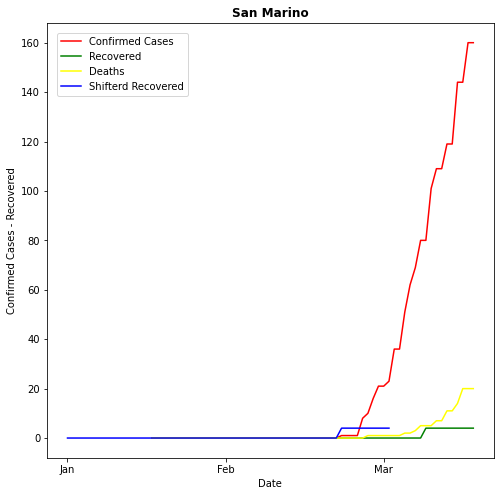

In [89]:
#各国の感染傾向を視覚化する．
import matplotlib.ticker as ticker

#列番号の取得
id_x = df.columns.get_loc('San Marino') #シンガポールを代表として求める．関心のある国に変えることで，各国の状況を閲覧する．

#グラフ化
fig, ax1  = plt.subplots(figsize=(8, 8))


ax1.plot(df.index, df[str(df.columns[id_x -2*len(country)])], color = 'red',label = "Confirmed Cases")
ax1.plot(df.index, df[str(df.columns[id_x - len(country)])], color = 'green',label = "Recovered")
ax1.plot(df.index, df[str(df.columns[id_x ])], color = 'yellow',label = "Deaths")
ax1.plot(df2_r.index, df2_r[str(df2_r.columns[id_x -2*len(country)])], color = 'blue',label = "Shifterd Recovered")

ax1.set_xlabel("Date")
ax1.set_ylabel("Confirmed Cases - Recovered")
plt.rcParams["font.size"] = 10
ax1.xaxis.set_major_locator(ticker.MultipleLocator(30.00))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.title(str(df.columns[id_x]),fontweight="bold")

ax1.legend(loc='upper left', borderaxespad=1, fontsize = 10)
plt.show()

In [90]:
#世界各国の感染傾向のグラフ化

fig, ax  = plt.subplots(dpi=100, figsize=(60, 120))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelbottom=False)
plt.tick_params(bottom=False)

for i in  range(len(country)):
    ax1 = fig.add_subplot(20, 10, i+1)

    id_x = i +2*len(country)

    ax1.plot(df.index, df[str(df.columns[id_x -2*len(country)])], color = 'red',label = "Confirmed Cases")
    ax1.plot(df.index, df[str(df.columns[id_x - len(country)])], color = 'green',label = "Recovered")
    ax1.plot(df.index, df[str(df.columns[id_x])], color = 'yellow', label = "Deaths")
    ax1.plot(df2_r.index, df2_r[str(df2_r.columns[id_x -2*len(country)])], color = 'blue',label = "Shifted Recovered")


    ax1.set_xlabel("Date")
    ax1.set_ylabel("Number of Cases/Recovered/Deaths")
    plt.rcParams["font.size"] = 10
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(30.00))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.title(str(df.columns[id_x]),fontweight="bold")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize = 7)
 
# general title
plt.suptitle("Where Countries Are on the Curve", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

dt_today = datetime.date.today()
plt.savefig(str(dt_today) + "_COVID-19_timeseries.png") #表示のみの場合は無効もしくは削除してください．
plt.savefig(str(dt_today) + "_COVID-19_timeseries.jpg") #表示のみの場合は無効もしくは削除してください．

Output hidden; open in https://colab.research.google.com to view.